Import everything we need

In [2]:
import sys
import os.path as op
module_path = op.abspath(op.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
from scipy.io import savemat, loadmat

from data_analysis.functions_connectivity import \
    plot_connectivity_matrix
from data_analysis.functions_graph_theory import \
    multi_small_world, epochs_swi, weighted_global_efficiency, lattice_reference, remove_self_edges

subject_dir = "/net/store/nbp/projects/hyperscanning/hyperscanning-2.0/mne_data/sourcedata/"
behav_dir = "/net/store/nbp/projects/hyperscanning/study_project/NBP_Hyperscanning/data_analysis/Behavioural_Analysis/BehaviouralData"
result_dir = "/net/store/nbp/projects/hyperscanning/study_project/results"

Define which pair/condition to load and load the data

In [3]:
# define which ISPCS to calculate
#['202','203','204','205','206','207','208','209','211','212']
subj_pair = '206'

# conditions ["early", "late"]
condition = "early"

# number of cores to use for parallel processing (ramsauer pc should have 80 cores)
n_jobs = 1

ispc_matrix = loadmat(op.join(result_dir, "ispc_matrices", subj_pair + "_" + condition + ".mat"))[condition]

/net/store/nbp/projects/hyperscanning/study_project/dirk/NBP_Hyperscanning/data_analysis/functions_connectivity.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(reversed(node_names))
/net/store/nbp/projects/hyperscanning/study_project/dirk/NBP_Hyperscanning/data_analysis/functions_connectivity.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(node_names)


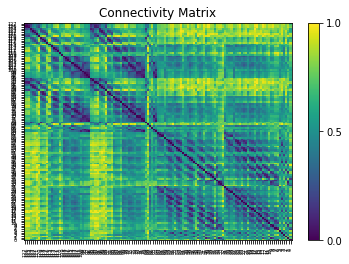

In [3]:
plot_connectivity_matrix(1 - ispc_matrix[0,:,:,0], node_names=[str(i) for i in range(128)])

In [3]:
weighted_global_efficiency(ispc_matrix[0,:,:,2])

2.2050794093841795

In [4]:
import matplotlib.pyplot as plt
from data_analysis.functions_graph_theory import weighted_sw_index

In [12]:
swis = []
for i in range(ispc_matrix.shape[3]):
    swi = weighted_sw_index(ispc_matrix[22,:,:,i], n_avg=2, n_iter=5)
    swis.append(swi)
    print(swi)


C: 0.451935300514158, Cr: 0.4207760013759007, Cl: 0.4458304186954555
L: 0.5702318512762107, Lr: 0.29498811160258087, Ll: 0.5911133468027061
SWI: 0.08769797279026453
C: 0.451935300514158, Cr: 0.4205801944858294, Cl: 0.44583237898555117
L: 0.5702318512762107, Lr: 0.2943455850121677, Ll: 0.591316834312887
SWI: 0.08815930746654066
0.0879286401284026
C: 0.454238386799409, Cr: 0.42508812512888405, Cl: 0.4486006114158368
L: 0.571643050206186, Lr: 0.27876580870171863, Ll: 0.586434688028076
SWI: 0.05960416347112122
C: 0.454238386799409, Cr: 0.4252573968236445, Cl: 0.44859982726540737
L: 0.571643050206186, Lr: 0.27780996211852516, Ll: 0.5864496579984765
SWI: 0.059562227849886774
0.059583195660504
C: 0.4438252063464138, Cr: 0.4124106296981401, Cl: 0.43840258624457396
L: 0.5899874403022068, Lr: 0.28650309990633216, Ll: 0.6001666211047388
SWI: 0.039223022218648304
C: 0.4438252063464138, Cr: 0.41264929688442387, Cl: 0.4384033352150917
L: 0.5899874403022068, Lr: 0.28428302589273796, Ll: 0.60022364712

In [ ]:
plt.plot(np.logspace(np.log10(4), np.log10(45), 20), swis)

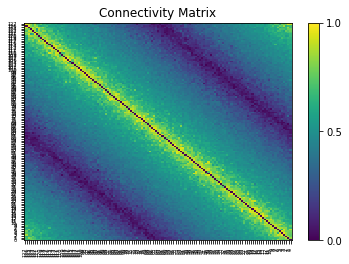

In [7]:
plot_connectivity_matrix(lattice_reference(remove_self_edges(ispc_matrix[0,:,:,0]), n_iter=3),
                         node_names=[str(i) for i in range(128)])

In [21]:
from networkx.algorithms import global_efficiency
import networkx as nx

# create an graph from the matrix
G = nx.convert_matrix.from_numpy_array(1 - ispc_matrix[4,::10,::10,1])
om = global_efficiency(G)
print(om)

1.0


Try out to calculate the SWI by hand (these are the same steps as in the core_swi function)

In [5]:
import networkx as nx

nrand=5
# create an graph from the matrix
graph = nx.convert_matrix.from_numpy_array(1 - ispc_matrix[0,:,:,0])

# create a container for the later small world references
small_worlds = []
for i in range(nrand):
    rand_ref = nx.random_reference(graph, connectivity=True, seed=None)
    latt_ref= nx.lattice_reference(graph, n_iter=1,D=None, connectivity=True, seed=None)

    # create all metrics: CPL&CC for observed/random/lattice
    CPL = nx.average_shortest_path_length(graph, weight='weight', method=None)
    CPL_R = nx.average_shortest_path_length(rand_ref, weight='weight', method=None)
    CPL_L = nx.average_shortest_path_length(latt_ref, weight='weight', method=None)
    CC = nx.average_clustering(graph, weight='weight')
    CC_R = nx.average_clustering(rand_ref, weight='weight')
    CC_L = nx.average_clustering(latt_ref, weight='weight')

    # calculate SWI
    SWI = ( (CPL - CPL_L) / (CPL_R - CPL_L) )   *   ( (CC - CC_R) / (CC_L - CC_R) )
    small_worlds.append(SWI)

ZeroDivisionError: float division by zero

In [38]:
CPL_R - CPL_L

0.0

In [4]:
epochs_swi(ispc_matrix[:2,:,:,:2])

2020-10-29 15:51:49,822 Progress: 0.0 %


Progress: 0.0 %


ZeroDivisionError: float division by zero

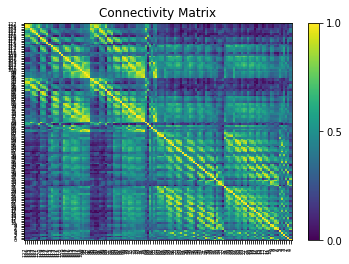

In [14]:
plot_connectivity_matrix(ispc_matrix[0,:,:,0], [i for i in range(128)])

In [8]:
import h5py
import os.path as op
from scipy.io import loadmat
result_dir = "/net/store/nbp/projects/hyperscanning/study_project/results"
subj_pair="202"
condition="early"
phase_angles = h5py.File(op.join(result_dir, "phase_angles", subj_pair + "_" + condition + ".hdf5"), "r")[condition]
times = loadmat(op.join(result_dir, "phase_angles", subj_pair + "_times.mat"))["times"]
phase_angles.shape

(208, 128, 20, 1537)

In [4]:
import sys
import os.path as op
module_path = op.abspath(op.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
from scipy.io import savemat, loadmat

from data_analysis.functions_connectivity import \
    plot_connectivity_matrix
from data_analysis.functions_graph_theory import \
    multi_small_world, epochs_swi, weighted_sw_index, lattice_reference, remove_self_edges

subject_dir = "/net/store/nbp/projects/hyperscanning/hyperscanning-2.0/mne_data/sourcedata/"
behav_dir = "/net/store/nbp/projects/hyperscanning/study_project/NBP_Hyperscanning/data_analysis/Behavioural_Analysis/BehaviouralData"
result_dir = "/net/store/nbp/projects/hyperscanning/study_project/results"

# define which ISPCS to calculate
#['202','203','204','205','206','207','208','209','211','212']
subj_pairs = ['206']

# conditions ["early", "late"]
conditions = ["early", "late"]

# number of cores to use for parallel processing (ramsauer pc should have 80 cores)
n_jobs = 3

for subj_pair in subj_pairs:
    for condition in conditions:
        # load the data and start small worldness computation
        ispc_matrix = loadmat(op.join(result_dir, "ispc_matrices", subj_pair + "_" + condition + ".mat"))[condition][:3,:, :, :2]
        small_worlds = multi_small_world(ispc_matrix, n_jobs=n_jobs, n_avg=5, n_iter=5)

        # save the first batch of data
        #savemat(op.join(result_dir, "small_worlds", subj_pair + "_" + condition + ".mat"),
        #        {condition:small_worlds})

    


KeyboardInterrupt: 